[Base de dados][1]

[1]: <https://www.cryptodatadownload.com/data/binance/>

<div style="text-align: justify"> 
<strong>Potifólio</strong> (ou carteira de investimento), no mundo do mercado financeiro, é o conjunto de investimentos em que é alocado um montante (ou ativos) do capital do investidor de modo que a cada investimento é alocada uma fração desse montante, de acordo com preferências e estratégias do investidor.
Quando falamos sobre "Otimização de Portifólios", estamos em busca de estratégias para selecionarmos a melhor distribuição dos ativos em uma carteira a fim de atingirmos um objetivo comum. Objetivo esse que pode variar de acordo com o perfil de cada tipo de investidor, pode ser que para um seja preferível maximizar o retorno esperado de seu portfóli,o mesmo com alto risco, enquanto, para outro, o objetivo seria investir em uma carteira com o menor risco possível, por exemplo.
A seguir serão discutidos esses conceitos e modos de otimização de portfólios utilizando a chamada <strong>Teoria Moderna do Portfólio</strong>, do laureado <strong>Harry Markowitz</strong> com o prêmio Nobel de Economia. 
    
<h3>1. Introdução</h3>
A essência da Teoria Moderna do Portfólio está ligada ao trade off existente entre o <strong>retorno</strong> e <strong>risco</strong>. Segundo Markowitz, os investidores seriam avessos ao risco, e, por isso, só estariam dispostos a aumentar o risco caso isso torne possível alcançar um retorno esperado mais alto.</div>

<div>Então a pergunta a ser respondida é: </div>
<div>"Considerando um certo nível de risco, de qual carteira séra obtida o maior retorno?".
Para isso, vamos antes entender melhor como calcular o <strong>retorno</strong> e <strong>risco</strong> de um portfólio.</div>



<h3>2. Retorno</h3>
<div style="text-align: justify"> Para calcularmos os retornos simples dos nossos ativos em python, podemos utilizar a função pct_change() da biblioteca pandas. Aqui, para exemplificar o nosso portfólio, utilizaremos uma carteira composta por pelos seguintes criptoativos:</div>
"ADA", "BNB", "BTC", "BTT", "DASH", "EOS", "ETC", "ETH", "LINK", "LTC" cotados na base da stablecoin USDT.

In [1]:
# Importando as bibliotecas 
import pandas as pd 
import numpy as np

In [2]:
from matplotlib import interactive

In [3]:
import matplotlib.pyplot as plt

In [4]:
from pandas_datareader import data

<h4>2.1. Montando o nossa carteira com preços de fechamento "ADA", "BNB", "BTC", "BTT", "DASH", "EOS", "ETC", "ETH", "LINK", "LTC"</h4>

#### Lista de criptoativo cotados na base da stablecoin [USD Tether (Dólar Tether ou USDT))][1]
##### *Por ser uma stablecoin para cada 1 USDT criado, a empresa gestora da Tether USDT precisa ter US$ 1 em suas reservas bancárias, garantindo que há os recursos necessários para os investidores da moeda.
[1]: <https://coinext.com.br/o-que-e-tether-usdt>

In [5]:
cryptos = 4
# ls_first_crypto = ["ADA", "BNB", "BTC", "BTT", "DASH", "EOS", "ETC", "ETH", "LINK", "LTC"][:cryptos]
ls_first_crypto = ["BNB", "BTC", "ETH", "LTC"][:cryptos]

len(ls_first_crypto)

4

#### É composto um dataframe **result** com os valores de fechamento de cada criptoativo.

In [6]:
frames = []
dataframes_names = []
for i, first_crypto in enumerate(ls_first_crypto):
    second_crypto = "USDT"
    par = """\\
def f():
    df_{0}{1} = pd.read_csv("Binance_{0}{1}_d.csv", low_memory=False)
    columns{0}{1} = list(df_{0}{1}.index[0])
    df_{0}{1} = pd.read_csv("Binance_{0}{1}_d.csv", names=columns{0}{1}, low_memory=False)
    df_{0}{1} = df_{0}{1}[['date', 'close']]
    return df_{0}{1}""".format(first_crypto, second_crypto)
    exec(par)
    frames += [f()]
    dataframes_names += [first_crypto]
    if len(frames) > 1:
        if len(frames) == 2:
            result = pd.merge(frames[0], frames[1], on="date", suffixes=("_" + dataframes_names[0], "_" + dataframes_names[1]))
        else:
            result = pd.merge(result, frames[i], on="date")
            result = result.rename(columns = {'close': 'close_' + dataframes_names[i]})

In [7]:
df = result
df.index = df["date"]
df = df.drop(columns = ["date"])

In [8]:
df = df[2:].dropna()
for column in df.columns:
    df[column] = pd.to_numeric(df[column], downcast="float")

In [9]:
df

,close_BNB,close_BTC,close_ETH,close_LTC
date,,,,
2021-04-18 00:00:00,513.829407,56150.011719,2235.639893,301.339996
2021-04-17 00:00:00,514.686096,60006.660156,2317.600098,300.859985
2021-04-16 00:00:00,508.274292,61334.800781,2422.669922,308.429993
2021-04-15 00:00:00,541.882385,63159.980469,2514.040039,285.630005
2021-04-14 00:00:00,550.018188,62959.531250,2432.600098,278.859985
...,...,...,...,...
2017-12-22 00:00:00,4.291200,13326.610352,635.969971,250.990005
2017-12-21 00:00:00,5.159600,15492.639648,782.409973,302.000000
2017-12-20 00:00:00,5.150200,16488.980469,790.210022,302.700012


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1218 entries, 2021-04-18 00:00:00 to 2017-12-18 00:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   close_BNB  1218 non-null   float32
 1   close_BTC  1218 non-null   float32
 2   close_ETH  1218 non-null   float32
 3   close_LTC  1218 non-null   float32
dtypes: float32(4)
memory usage: 28.5+ KB


<h4>2.2. Retorno simples dos ativos</h4>

In [11]:
df.pct_change().head()

,close_BNB,close_BTC,close_ETH,close_LTC
date,,,,
2021-04-18 00:00:00,NaN,NaN,NaN,NaN
2021-04-17 00:00:00,0.001667,0.068685,0.036661,-0.001593
2021-04-16 00:00:00,-0.012458,0.022133,0.045336,0.025161
2021-04-15 00:00:00,0.066122,0.029758,0.037715,-0.073923
2021-04-14 00:00:00,0.015014,-0.003174,-0.032394,-0.023702


<h4>2.3. vetor de pesos w</h4>

Precisamos calcular o retorno do portfólio como um todo. Para isso, distribui-se a porcentagem que cada ativo receberá na nossa carteira criando um vetor de pesos w e multiplicando-o pelos retornos simples dos ativos:

In [12]:
r = df.pct_change() # retorno do portfólio
w = [0.1, 0.1, 0.2, 0.2, 0.05, 0.05, 0.1, 0.1, 0.2, 0.2][:cryptos] # pesos de cada ativo na ordem dos nomes das colunas do dataframe de retorno r (ou df.pct_change())
R = np.dot(r, w) # retorno do portfólio, poderado pelo vetor de pesos w

<div style="text-align: justify"> <h3>3. Risco vol (de volatividade)</h3>
Existem várias formas diferentes para se calcular o risco do investimento, mas no geral, essas métricas estarão relacionadas a quão volátil é um ativo. Ativos muitos voláteis, ou seja, que variam muito, não são muito seguros. Assim, a forma mais comum de se obter esse tipo de métrica para uma ação é através do cálculo de seu desvio padrão:</div>

In [13]:
vol = df.std()
vol

close_BNB       69.475433
close_BTC    11990.398438
close_ETH      447.880707
close_LTC       57.814102
dtype: float32

<div style="text-align: justify">Intuitivamente, poderíamos pensar que para calcular o risco de uma carteira, bastaria multiplicar o risco de cada uma de suas ações pelo vetor de pesos de seu portfólio, mas segundo Markowitz, em um portfólio, o seu risco não será igual à média do risco de cada um de seus ativos, pois deve se levar em conta como todas as ações estão se movimentando em conjunto. Para refletir esse aspecto, precisamos antes calcular a matriz de covariância das médias dos retornos:</div>

In [14]:
# retorno simples 
r = df.pct_change()

# média dos retornos anualizados 
mean_returns = r.mean() * 252
mean_returns

close_BNB   -0.409385
close_BTC    0.002361
close_ETH    0.151776
close_LTC    0.413437
dtype: float32

In [15]:
# matriz de covariância 
covariance = np.cov(r[1:].T)
covariance

array([[0.00411689, 0.00196931, 0.00247972, 0.00242481],
       [0.00196931, 0.00192642, 0.00207897, 0.00203292],
       [0.00247972, 0.00207897, 0.00314688, 0.00267084],
       [0.00242481, 0.00203292, 0.00267084, 0.00312597]])

Tendo calculado a matriz de covariância ( C ), e com os nossos vetores de pesos (w), em seguida, vamos utilizar esta fórmula para calcular o risco do portfólio:

In [16]:
w = pd.DataFrame(w)
w

,0
0,0.1
1,0.1
2,0.2
3,0.2


Risco do portfólio anualizado

In [17]:
vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252) # o risco é de aproximadamente 1 USDT
vol

array([[0.48281927]])

<div style="text-align: justify"> <h3>3. Sharpe Ratio</h3>
Todo investimento possui uma certa taxa de risco associada a ele, mas é certo que alguns investimentos são mais seguros do que outros, certo?
O Sharpe Ratio é uma métrica utilizada para nos ajudar a analisar se estamos sendo devidamente recompensados por uma taxa adicional de risco assumido. Para isso, ele <strong>compara o retorno de um investimento que possui um risco associado com um outro de "risco livre"</strong>. No caso de uma carteira de ações na bolsa brasileira, ele poderia comparar o retorno dela com um o retorno de um investimento em renda fixa, por exemplo.
Para calcular o sharpe ratio subtraimos o taxa de risco livre do retorno do portfólio e dividimos esse valor pelo risco do portfólio:</div>
<center><img src="shape_ratio.png"/></center>

Quanto maior for o valor do Sharpe Ratio, mais atraente será esse investimento dado o risco associado. Porém, um valor negativo significa que a taxa livre de risco é maior que o retorno do portfólio. De maneira geral, um sharpe ratio maior que 1 é considerado bom.

### Simulando Portfólios
Agora que já entendemos como calcular o retorno e o risco de um portfólio, vamos simular várias carteiras com pesos diferentes e observar qual delas irá nos retornar o portfólio com o maior Sharpe Ratio.

In [18]:
def generate_wallets(df_close, num_portfolios = 10000, risk_free = 0):
    # vetores de dados
    portfolio_weights = []
    portfolio_exp_returns = []
    portfolio_vol = []
    portfolio_sharpe = []

    # retorno simples 
    r = df.pct_change()
    mean_returns = r.mean() * 252

    # matriz de covariância 
    covariance = np.cov(r[1:].T)

    for i in range(num_portfolios):
        # gerando pesos aleatórios
        k = np.random.rand(len(df.columns))
        w = k / sum (k)

        # retorno
        R = np.dot(mean_returns, w)

        # risco
        vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252)

        # sharpe ratio
        sharpe = (R - risk_free)/vol

        portfolio_weights.append(w)
        portfolio_exp_returns.append(R)
        portfolio_vol.append(vol)
        portfolio_sharpe.append(sharpe)

    wallets = {'weights': portfolio_weights,
              'returns': portfolio_exp_returns,
              'vol':portfolio_vol,
              'sharpe': portfolio_sharpe}

    return wallets

### Para descobrirmos qual carteira obteve o melhor Sharpe Ratio, utilizamos a seguinte função:

In [19]:
def best_portfolio(wallets):
    sharpe = wallets['sharpe']
    weights = wallets['weights']
    
    indice = np.array(sharpe).argmax()
        
    return weights[indice]

#### Fazendo uma simulação com as funções que descrevemos acima, a carteira que nos retornaria o maior Sharpe Ratio seria a com a seguinte distribuição de pesos:

In [20]:
wallets = generate_wallets(df)

In [21]:
best_portfolio(wallets)

array([0.00818011, 0.00247626, 0.11522876, 0.87411487])

### A Fronteira Eficiente
Se pegarmos todos os portfólios que foram gerados e plotarmos em um gráfico, tendo como referência os __retornos no eixo y, e os riscos no eixo x,__ temos um esquema que é conhecido como a "Fronteira Eficiente". 

In [22]:
def plot_efficient_frontier(wallets):
    vol = wallets['vol']
    returns = wallets['returns']
    sharpe = wallets['sharpe']

    indice = np.array(sharpe).argmax()
    y_axis = returns[indice]
    X_axis = vol[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.title("Efficient Frontier")
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.show()

### A Fronteira Eficiente

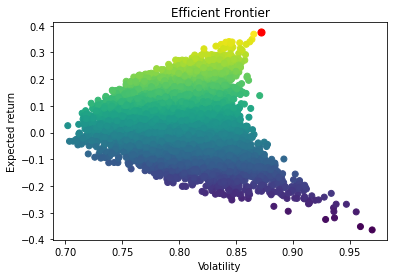

In [23]:
plot_efficient_frontier(wallets)

__O que é um bom portfólio?__

Mas afinal, o que é a fronteira eficiente?
A fronteira eficiente nada mais é do que a linha que representa os retornos máximos que podemos obter com um portfólio dado um certo nível de risco. Portfólios ótimos sempre devem estar na linha da fronteira, pois, para qualquer portfólio abaixo da linha, há uma carteira disponível com o mesmo risco associado, porém com um retorno maior. Qualquer portfólio acima da fronteira é impossível.

### Afinal, o que é um bom portfólio?

Para calcular o nosso melhor portfólio, utilizamos como métrica o maior Sharpe Ratio, porém, analisando o que acabamos de ver sobre a fronteira eficiente, você pode estar se perguntando o que constituiria um bom portfólio no final das contas, e a resposta é: depende!
Um bom portfólio vai depender do tipo de investidor e o que ele espera ganhar com os seus investimentos. Para uma pessoa que está próxima da aposentadoria, talvez seja preferível um portfólio que oferece um risco menor, já para uma pessoa mais jovem, talvez aumentar seus retornos com um portfólio um pouco mais arriscado seja uma opção mais atraente.
Independente do nível de risco que o investidor estará disponível a aceitar, o importante é estar na linha da fronteira.
Tendo isso em mente, podemos __modificar o nosso código para adicionar métodos para retornar a carteira com o menor risco e o maior retorno:__

In [24]:
def best_portfolio(wallets, method = 'sharpe_ratio'):
    vol = wallets['vol']
    sharpe = wallets['sharpe']
    weights = wallets['weights']
    returns = wallets['returns']
    
    if method == 'sharpe_ratio':

        indice = np.array(sharpe).argmax()

    elif method == 'volatility':

        indice = np.array(vol).argmin()

    elif method == 'return':

        indice = np.array(returns).argmax()

    return weights[indice]

In [25]:
def plot_efficient_frontier(wallets, method = 'sharpe_ratio'):
    vol = wallets['vol']
    returns = wallets['returns']
    sharpe = wallets['sharpe']

    if method == 'sharpe_ratio':

        indice = np.array(sharpe).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'volatility':

        indice = np.array(vol).argmin()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'return': 

        indice = np.array(returns).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.title("Efficient Frontier")
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.show()

In [26]:
wallets = generate_wallets(df)

In [27]:
best_portfolio(wallets, method = 'sharpe_ratio')

array([0.01789229, 0.02232115, 0.02124075, 0.93854581])

In [28]:
for i in range(len(ls_first_crypto)):
    print(ls_first_crypto[i], str(round(best_portfolio(wallets, method = 'sharpe_ratio')[i]*100,4)) + " %")

BNB 1.7892 %
BTC 2.2321 %
ETH 2.1241 %
LTC 93.8546 %


### Risco Moderado

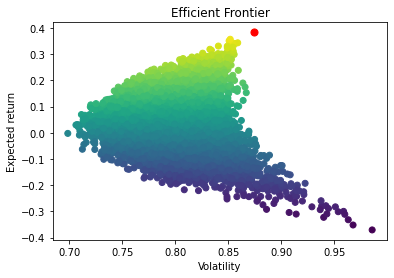

In [29]:
plot_efficient_frontier(wallets, method = 'sharpe_ratio')

In [30]:
best_portfolio(wallets, method = 'volatility')

array([0.02595889, 0.95091078, 0.01332936, 0.00980097])

In [31]:
for i in range(len(ls_first_crypto)):
    print(ls_first_crypto[i], str(round(best_portfolio(wallets, method = 'volatility')[i]*100, 4)) + " %")

BNB 2.5959 %
BTC 95.0911 %
ETH 1.3329 %
LTC 0.9801 %


### Baixo Risco com retorno mais baixo

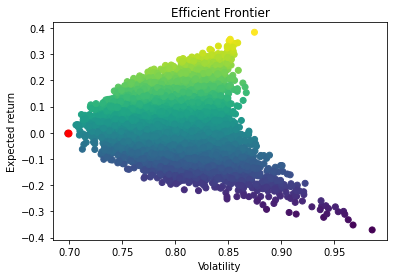

In [32]:
plot_efficient_frontier(wallets, method = 'volatility')

In [33]:
best_portfolio(wallets, method = 'return')

array([0.01789229, 0.02232115, 0.02124075, 0.93854581])

In [34]:
for i in range(len(ls_first_crypto)):
    print(ls_first_crypto[i], str(round(best_portfolio(wallets, method = 'return')[i]*100, 4)) + " %")

BNB 1.7892 %
BTC 2.2321 %
ETH 2.1241 %
LTC 93.8546 %


### Maior risco com chances de retornos maiores

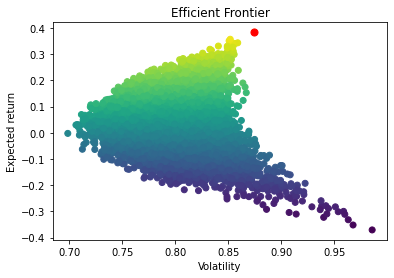

In [35]:
plot_efficient_frontier(wallets, method = 'return')